# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


### Objectives

1. **Primary Objective:** 
   - Develop a model to understand used car prices using features and consumer spending habits.
   - This involves creating a predictive model using regression techniques to estimate car prices based on available data.
   - The features considered include year, odometer reading, fuel type, title status, transmission type, and state.

2. **Secondary Objective:** 
   - Perform feature importance analysis to identify which factors are most influential in determining car prices.
   - Use clustering techniques to segment the market based on these features.
   - The clustering will help identify distinct segments within the used car market, providing insights into consumer preferences and pricing trends.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The data features and size is relatively moderate with only 8 columns. I was expecting data to have different features that would indicate luxury but these are pretty common features that can be found in any car. I've provided the table below:
| Column Index | Column Name   | Non-Null Count | Data Type |
|--------------|---------------|----------------|-----------|
| 0            | price         | 416990         | float64   |
| 1            | year          | 416990         | float64   |
| 2            | odometer      | 416990         | float64   |
| 3            | model         | 416990         | object    |
| 4            | fuel          | 416990         | object    |
| 5            | title_status  | 416990         | object    |
| 6            | transmission  | 416990         | object    |
| 7            | state         | 416990         | object    |

**Dtypes:** float64(3), object(5)
**Memory Usage:** 29.3+ MB

Since we are looking for an indication of value, I decided to  use the 'price' column as the target. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 


Data Preparation:



### Data Preparation

1. **Identifying Missing Values:**
   - I used `df.isnull().sum().plot(kind='bar')` to determine which features had missing values and how many. 
   - Plot provided.
   - I removed the `size`, `VIN`, `paint_color`, and `type` columns because they either had too many missing rows or the information wasn't statistically relevant.

2. **Addressing Structural Issues:**
   - The `model` feature contained data that wasn't well formatted and caused extraordinarily long strings within its feature set.
   - I decided to remove this column since we have the `manufacturer` column.

3. **Handling Missing Data:**
   - There were hundreds of thousands of missing values across many features.
   - I didn't feel comfortable using the `dropna()` method, so I decided to use MICE (Multiple Imputation by Chained Equations), a statistical technique used to handle missing data in datasets.
   - MICE is excellent for handling missing data because, in practice, the method of prediction is similar to other prediction models we've been using. It didn't matter whether we were using other columns or actual values from another dataset; the need was the same (prediction).
   - I read about the hyperparameter needs to ensure prediction accuracy and chose these hyperparameters:

```python
param_grid = {
    'imputer__max_iter': [5, 10, 20],
    'imputer__n_nearest_features': [10, 15, 20],
    'imputer__tol': [1e-3, 1e-4, 1e-5]
}

Plot for missing values per feature

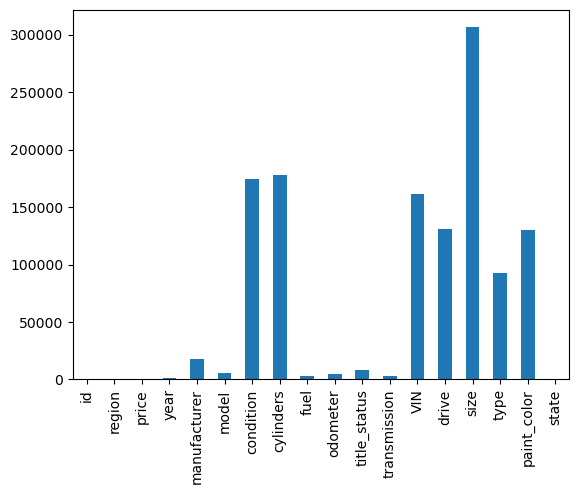

### Data Normalization

- The `Price` and `Odometer` features were extremely skewed.
- To address this, I normalized the data by applying an aggressive IQR (Interquartile Range) upper and lower limit.

Skewed data plot of price and odometer

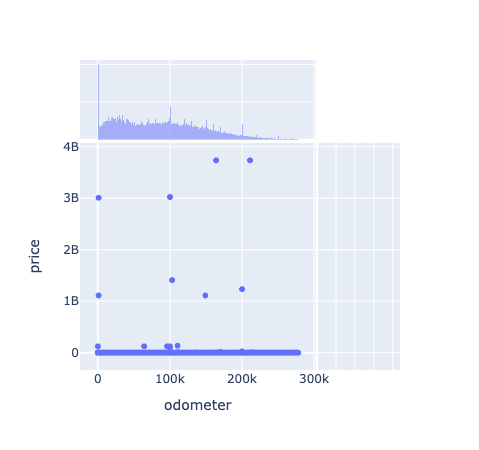

### Enforcing Stricter IQR Boundaries

After enforcing stricter IQR boundaries:

```python
# Recalculate tighter IQR bounds with a stricter multiplier (e.g., 1.0) on vehicles_imputed
Q1_price = vehicles_imputed['price'].quantile(0.25)
Q3_price = vehicles_imputed['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.0 * IQR_price
upper_bound_price = Q3_price + 1.0 * IQR_price

Q1_odometer = vehicles_imputed['odometer'].quantile(0.25)
Q3_odometer = vehicles_imputed['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lower_bound_odometer = Q1_odometer - 1.0 * IQR_odometer
upper_bound_odometer = Q3_odometer + 1.0 * IQR_odometer

Afterwards:

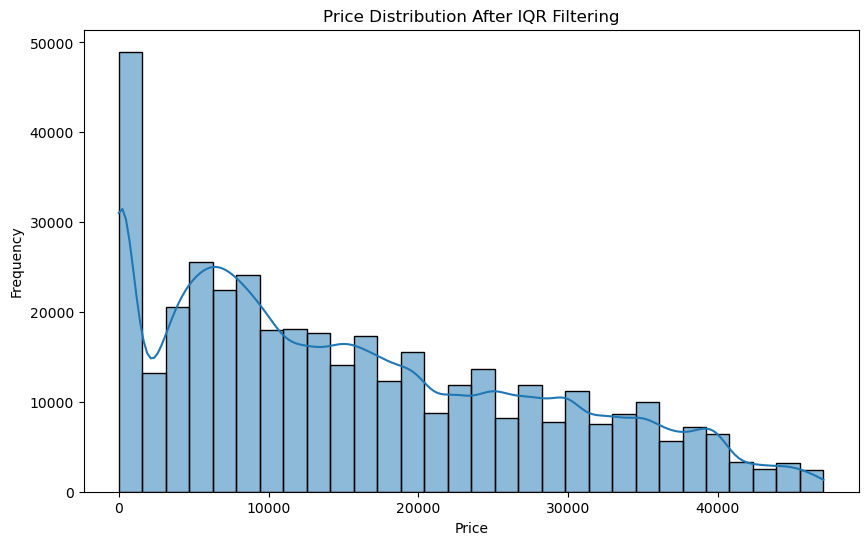
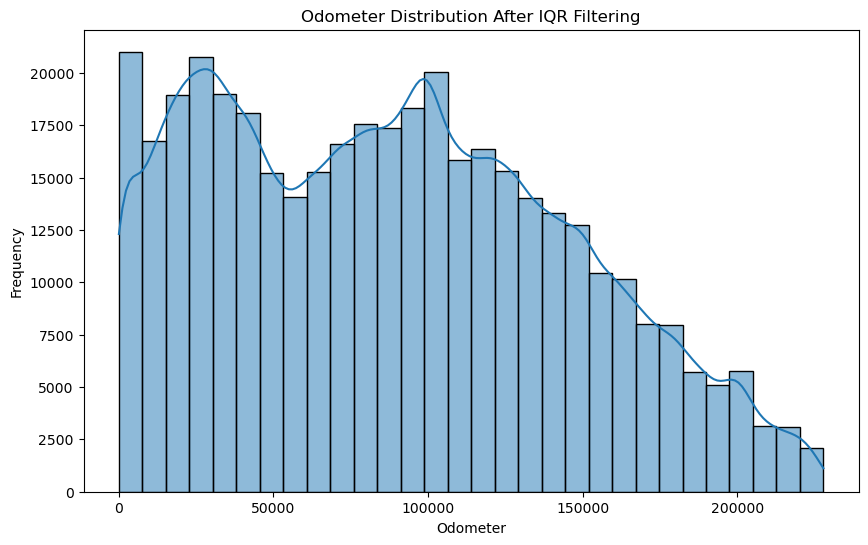

Finding the right method to normalize this data was possibly the most difficlut task of this project. There were extreme outliers on both tails of the distribution. I tried everything from box cox  to setting the mean to 40000 but the only method that worked effectivtly that allowed me to model was a stricter multiplier for IRQ.


After everything the data was now ready for modeling and although I cut out a lot of data, I was able to save even more due to MICE and proper encoding. 
### DataFrame Summary

```python
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398143 entries, 0 to 398142
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           398143 non-null  float64
 1   year            398143 non-null  int64  
 2   odometer        398143 non-null  float64
 3   region          398143 non-null  object 
 4   manufacturer    398143 non-null  object 
 5   condition       398143 non-null  object 
 6   fuel            398143 non-null  object 
 7   title_status    398143 non-null  object 
 8   transmission    398143 non-null  object 
 9   state           398143 non-null  object 
 10  kmeans_cluster  398143 non-null  int64  


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

K-means provided the most clartity for number of k values. I tried dbscan but it just showed one cluster amongust all the data. After several different supervised models this one showed to be the most promising. It also provided the answer to the question that we wanted to know from the business needs. 

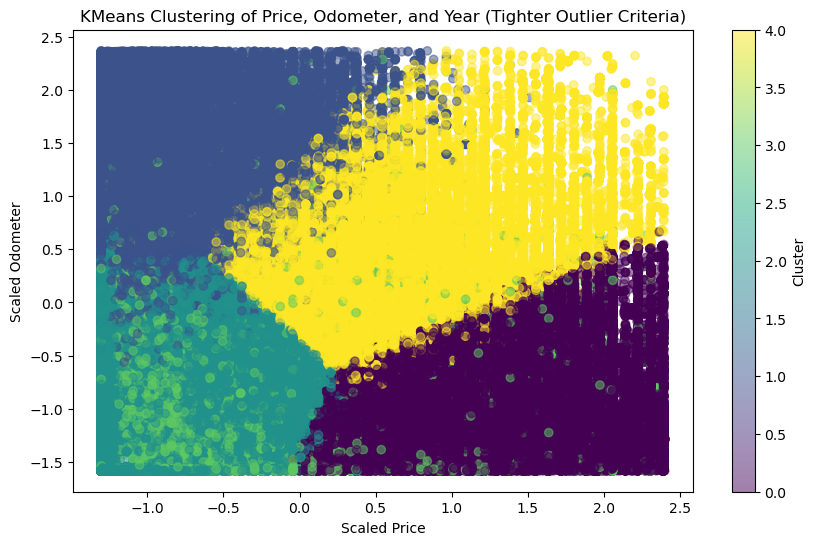

### KMeans Clustering Results

| kmeans_cluster | price        | odometer      | year      |
|----------------|--------------|---------------|-----------|
| 0              | 30042.215647 | 32770.324330  | 2017.006570 |
| 1              |  6408.522115 | 152188.101934 | 2006.835117 |
| 2              |  6279.458696 | 60204.406775  | 2013.693971 |
| 3              | 13450.544820 | 57231.952682  | 1969.944670 |
| 4              | 19998.308737 | 107263.591067 | 2012.959614 |


### Summary Statistics for Top 10% Car Values

| Statistic       | price         | year          | odometer      | kmeans_cluster |
|-----------------|---------------|---------------|---------------|----------------|
| **count**       | 39814.000000  | 39814.000000  | 39814.000000  | 39814.000000   |
| **mean**        | 39330.663812  | 2015.941101   | 45786.082379  | 3.085874       |
| **std**         | 3373.045313   | 8.135125      | 43576.281285  | 0.335277       |
| **min**         | 34590.000000  | 1900.000000   | 0.000000      | 1.000000       |
| **25%**         | 36590.000000  | 2015.000000   | 14833.000000  | 3.000000       |
| **50%**         | 38990.000000  | 2018.000000   | 30559.000000  | 3.000000       |
| **75%**         | 41590.000000  | 2019.000000   | 62994.000000  | 3.000000       |
| **max**         | 47051.000000  | 2022.000000   | 227774.000000 | 4.000000       |

### Mode for Categorical Features in Top 10% Car Values

| Feature         | Mode Value                      |
|-----------------|---------------------------------|
| **region**      | kennewick-pasco-richland        |
| **manufacturer**| ford                            |
| **condition**   | good                            |
| **fuel**        | gas                             |
| **title_status**| clean                           |
| **transmission**| automatic                       |
| **state**       | ca                              |

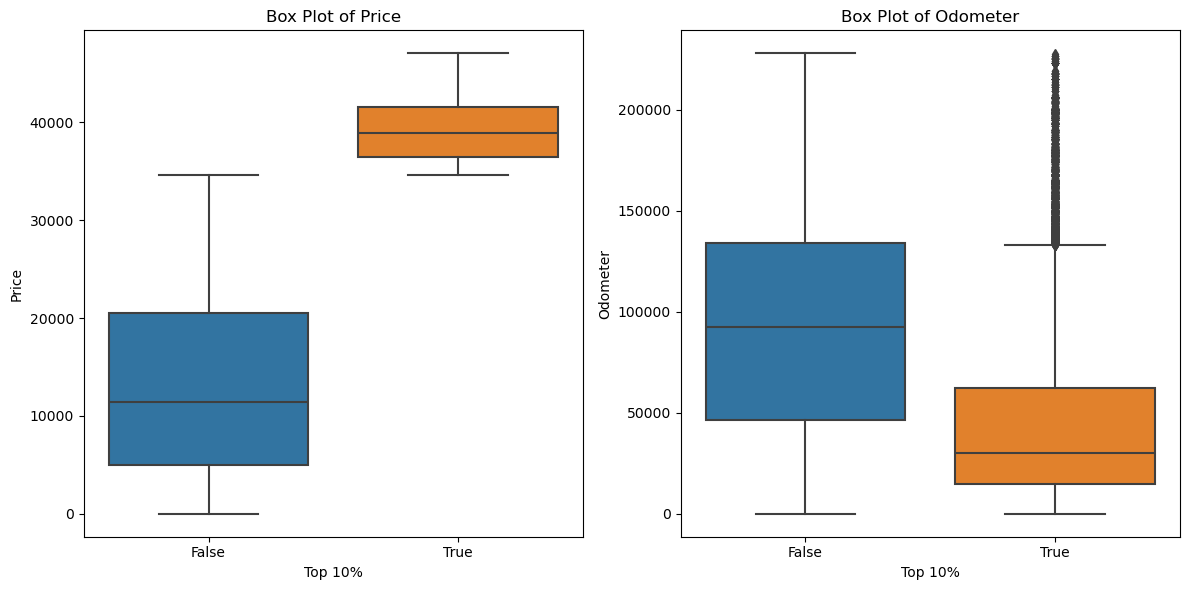


DBScan plot

Silhouette Score for best params: -0.06985231169012358

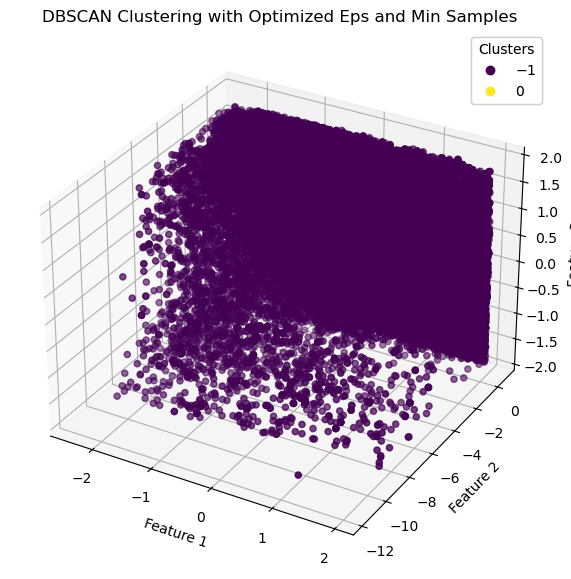



Sequentional Feature Selection with polynomial 3
### Metrics for the Polynomial Regression Model

- **Mean Squared Error (MSE):** 73,357,660.92
- **Mean Absolute Error (MAE):** 6,323.24
- **R-squared:** 0.5092

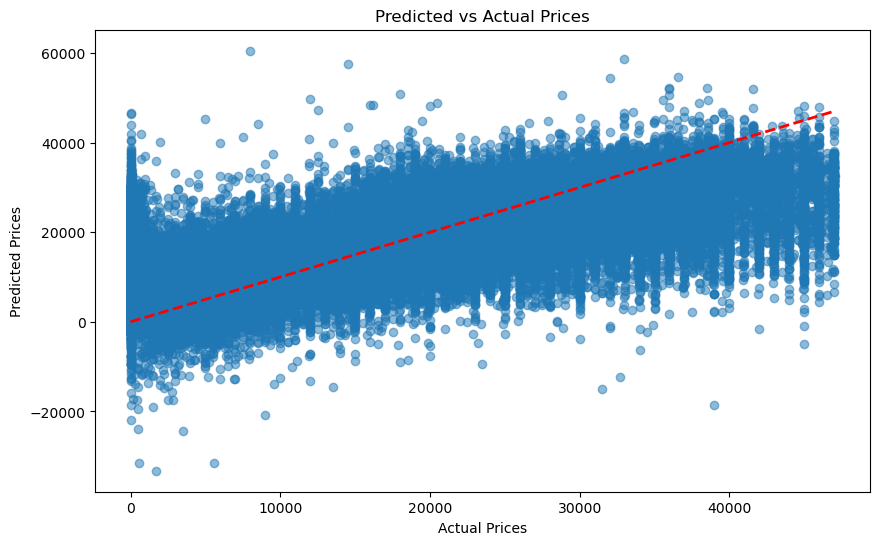


Linear models were not effective due to the nonlinear correlations present in the data. This explains why clustering techniques provided better results. The linear models failed to fit properly because the relationships within the data exhibited heteroscedasticity

Plots of the residual low price group and the plot above show the lack of a clear pattern or tren meaning no strong linear relationship. The data appeared to be more complex than what a linear model could model.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

There were the questions that we needed to answer in the "Business Understand" phase. 


1. **Primary Objective:** 
   - Develop a model to understand used car prices using features and consumer spending habits.
   - This involves creating a predictive model using regression techniques to estimate car prices based on available data.
   - The features considered include year, odometer reading, fuel type, title status, transmission type, and state.

2. **Secondary Objective:** 
   - Perform feature importance analysis to identify which factors are most influential in determining car prices.
   - Use clustering techniques to segment the market based on these features.
   - The clustering will help identify distinct segments within the used car market, providing insights into consumer preferences and pricing trends.

How can we determine what customer value in cars? 

By using the prices that they pay as a indicator of value.This will provide us with an understanding if we are using the right target feature and if our filtering provides us any answers.

I beleive the k-means clustering model has satisfied our answers by grouping together the top 10% of used car buyers and extracting out the features of those vehicles. 

### Summary Statistics for Top 10% Car Values

| Statistic       | price         | year          | odometer      | kmeans_cluster |
|-----------------|---------------|---------------|---------------|----------------|
| **count**       | 39814.000000  | 39814.000000  | 39814.000000  | 39814.000000   |
| **mean**        | 39330.663812  | 2015.941101   | 45786.082379  | 3.085874       |
| **std**         | 3373.045313   | 8.135125      | 43576.281285  | 0.335277       |
| **min**         | 34590.000000  | 1900.000000   | 0.000000      | 1.000000       |
| **25%**         | 36590.000000  | 2015.000000   | 14833.000000  | 3.000000       |
| **50%**         | 38990.000000  | 2018.000000   | 30559.000000  | 3.000000       |
| **75%**         | 41590.000000  | 2019.000000   | 62994.000000  | 3.000000       |
| **max**         | 47051.000000  | 2022.000000   | 227774.000000 | 4.000000       |

### Mode for Categorical Features in Top 10% Car Values

| Feature         | Mode Value                      |
|-----------------|---------------------------------|
| **region**      | kennewick-pasco-richland        |
| **manufacturer**| ford                            |
| **condition**   | good                            |
| **fuel**        | gas                             |
| **title_status**| clean                           |
| **transmission**| automatic                       |
| **state**       | ca                              |



### KMeans Clustering Results

| kmeans_cluster | price        | odometer      | year      |
|----------------|--------------|---------------|-----------|
| 0              | 30042.215647 | 32770.324330  | 2017.006570 |
| 1              |  6408.522115 | 152188.101934 | 2006.835117 |
| 2              |  6279.458696 | 60204.406775  | 2013.693971 |
| 3              | 13450.544820 | 57231.952682  | 1969.944670 |
| 4              | 19998.308737 | 107263.591067 | 2012.959614 |

We know buyers value low milage over every other feature and that some even enjoy some the American past time as our fourth highest paying group loves their 1969 vehicles with low milage.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### KMeans Clustering Results

| kmeans_cluster | price        | odometer      | year      |
|----------------|--------------|---------------|-----------|
| 0              | 30042.215647 | 32770.324330  | 2017.006570 |
| 1              |  6408.522115 | 152188.101934 | 2006.835117 |
| 2              |  6279.458696 | 60204.406775  | 2013.693971 |
| 3              | 13450.544820 | 57231.952682  | 1969.944670 |
| 4              | 19998.308737 | 107263.591067 | 2012.959614 |

Please read the Evaluation section above team. If no questions are necessary, then our next move will be to discover vehicles that we can purchase 15% or less with the features indicated in the table above. Let's dive into how we can target those vehicles so we can sell them at a premium to our customers. 